<p style="text-align:center; font-size:xx-large; color:black;">Linear Models in Python</p>

### <font color='black'>Table of contents<font><a class='anchor' id='top'></a>
- [A Mathematical Intro to Linear Models](#1)
- [Running Linear Regressions in Statsmodels](#2)
- [Diagnostic Plots (explain Linear Model Assumptions)](#3)
- [Model Metrics](#4)
- [Cross-Validation (CV) Techniques](#5)
- [Subset Selection Methods](#6)
- [Regularization Techniques](#7)
- [Example of Finding an Appropriate Linear Model for Diabetes Dataset](#8)

<hr>
<p style="text-align:center; font-size:x-large; color:black;">A Mathematical Introduction to OLS Regression</p>
<hr>

When performing a Linear Regression, our goal is to model the relationship between one or more independent variables (predictors) and a dependent variable (response) by fitting a linear equation to observed data. This line of best fit is calculated analytically, and is done through a method called Ordinary Least Squares (OLS for short). In this section, I will walk through the math used to calculate the line of best fit. <br>

Suppose we had n observations of data where there was one response variable Y along with p independent predictors x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>p</sub>. Additionally, suppose that each of our Y observations y<sub>i</sub> could be expressed as a linear combination of the observations of our p predictors, plus a normally distributed random error term. In matrix notation, we can express this assumption as the following... For reference, x<sub>p, i</sub> represents the i<sup>th</sup> observation of the p<sup>th</sup> predictor.

$$
y_{i} = \beta_{0} + \beta_{1}x_{1,i} + \beta_{2}x_{2,i} + \text{ } ... \text{ } + \beta_{p}x_{p,i} + \epsilon_{i}
$$ 

$$
= 
\begin{bmatrix}
\beta_{0} & \beta_{1} & ... & \beta_{p} \\
\end{bmatrix}  
\begin{bmatrix}
1 \\
x_{1,i} \\
x_{2,i} \\
\vdots \\
x_{p,i} \\
\end{bmatrix}
 + \epsilon_{i}
$$ 

$$
\text{ where }  \epsilon_{i} \sim N(0,\sigma^{2})
$$

If we wanted to express every single observation as one giant equation, we can do the following...

$$
\begin{bmatrix}
y_{1} & y_{2} & ... & y_{n} \\
\end{bmatrix} = 
\begin{bmatrix}
\beta_{0} & \beta_{1} & ... & \beta_{p} \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 & ... & 1 \\
x_{1,1} & x_{1,2} & ... & x_{1,n} \\
x_{2,1} & x_{2,2} & ... & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{p,1} & x_{p,2} & ... & x_{p,n} \\
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{n} \\
\end{bmatrix}, \text{ where } \epsilon_{i} \sim N(0,\sigma^{2}) \\
$$

$$ \vdots $$

$$
Y = \beta X + \epsilon 
$$

Since each  e<sub>i</sub> is a normally distributed random variable, we can only develop an expectation for y<sub>i</sub> given our linear combination of predictors. Our prediction for y<sub>i</sub> is often called "Y-hat"
$$
\hat{y_{i}} = E[{y_{i} \text{ }| \text{ } x_i, \text{ } \beta}] =  \beta x_{i}
$$

$$
\hat{Y_{i}} = E[{Y_{i} \text{ }| \text{ } X, \text{ } \beta}] =  \beta X
$$

So far, we haven't actually calculated &beta;. We want to find a &beta; that minimizes the variance of our normally distributed &epsilon;<sub>i</sub>s. To understand why, let's imagine a scenario where two weathermen are providing a forecast for tomorrow's weather. Weatherman 1 says that he's 95% confident that the temperature tomorrow will be between 0 and 100 degrees Fahrenheit. Weatherman 2 says that he's 95% confident that the temperature tomorrow will be between 65 and 67 degrees fahrenheit. Obviously weatherman 2's forecast would be considered better because it provides a more precise estimate of tomorrow's temperature.

$$
\text{Var}(e_{i}) = \frac{1}{n} \sum_{i=1}^{n} (e_{i} - E[e_{i}])^{2}
$$

$$
= \frac{1}{n} \sum_{i=1}^{n} (e_{i})^{2}
$$

$$
= \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}
$$

We quickly realize that the variance of &epsilon;<sub>i</sub> is equivalent to something called the mean squared error (MSE). Therefore, minimizing the MSE results in a minimization in the variance of &epsilon;<sub>i</sub>. We can extrapolate even further and realize that minimizing the Residual Sum of Squares (RSS) minimizes the MSE

$$
\text{Mean Squared Error (MSE)} = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}
$$

$$
\text{Residual Sum of Squares (RSS)} = \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} = \text{MSE} * n
$$

Now, we can utilize calculus and linear algebra to find the &beta; that minimizes RSS

$$
\min_{\beta} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} = \min_{\beta} (Y - \hat{Y_{i}})^2  = \min_{\beta} (Y - \beta X)^2
$$

$$
\frac{d}{d\beta} (Y-\beta X)^2 = 2(Y-\beta X) * -X^{T} = -2X^{T} (Y-\beta X)
$$

$$
-2X^{T} (Y-\beta X) = 0
$$

$$
X^{T} (Y-\beta X) = 0
$$

$$
X^{T}Y - X^{T}X\beta = 0
$$

$$
X^{T}X\beta = X^{T}Y
$$

$$
\beta = (X^{T}X)^{-1}X^{T}Y
$$

$$
\frac{d^{2}}{d\beta d\beta^{T}} = 2 \parallel X \parallel ^{2} \text{ } \geq \text{ } 0
$$

Since the RSS is a quadratic function and our second derivative is postive, we know that we have found the global minimum. Say something about Gradient Descent


<hr>
<p style="text-align:center; font-size:x-large; color:black;">Running OLS in Statsmodels and Scikit-Learn</p>
<hr>

In [ ]:
# All packages used throughout this notebook

# General
import warnings                                                             
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from itertools import combinations

# Statmosdels
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import *
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

# Scikit-Learn
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut, GridSearchCV, train_test_split
from scipy.stats import jarque_bera

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

Before running any type of regression, we need some data. Scikit-Learn has some free-to-use data sets, and all be using the Diabetes Dataset. <br><br>
 __age__ - age in years <br>
__sex__ - male or female <br>
__bmi__ - body mass index <br>
__bp__- average blood pressure <br>
__s1__- TC: total serum cholesterol <br>
__s2__- LDL: low-density lipoproteins <br>
__s3__- HDL: high-density lipoproteins <br>
__s4__- TCH: total cholesterol / HDL <br>
__s5__- LTG: possibly log of serum triglycerides level <br>
__s6__- GLU: blood sugar level <br>
__target__: a quantitative measure of disease progression one year after baseline <br>

In [2]:
diabetes = load_diabetes(scaled = True)     
# scaled = True makes sure that our data is normalized, which is important when the predictors have varying scales.
# If a predictor has values ranging from 0 - 10 million, while another predictor has values ranging from 0 - 0.1. 
# This potentially results in misrepresentative beta coefficients.
# Normalization enforces the same scale upon every predictor.

df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


If we wanted to visualize this data real quick, we can use Seaborn to do a pariplot, which plots every possible pair of variables (predictor and response).

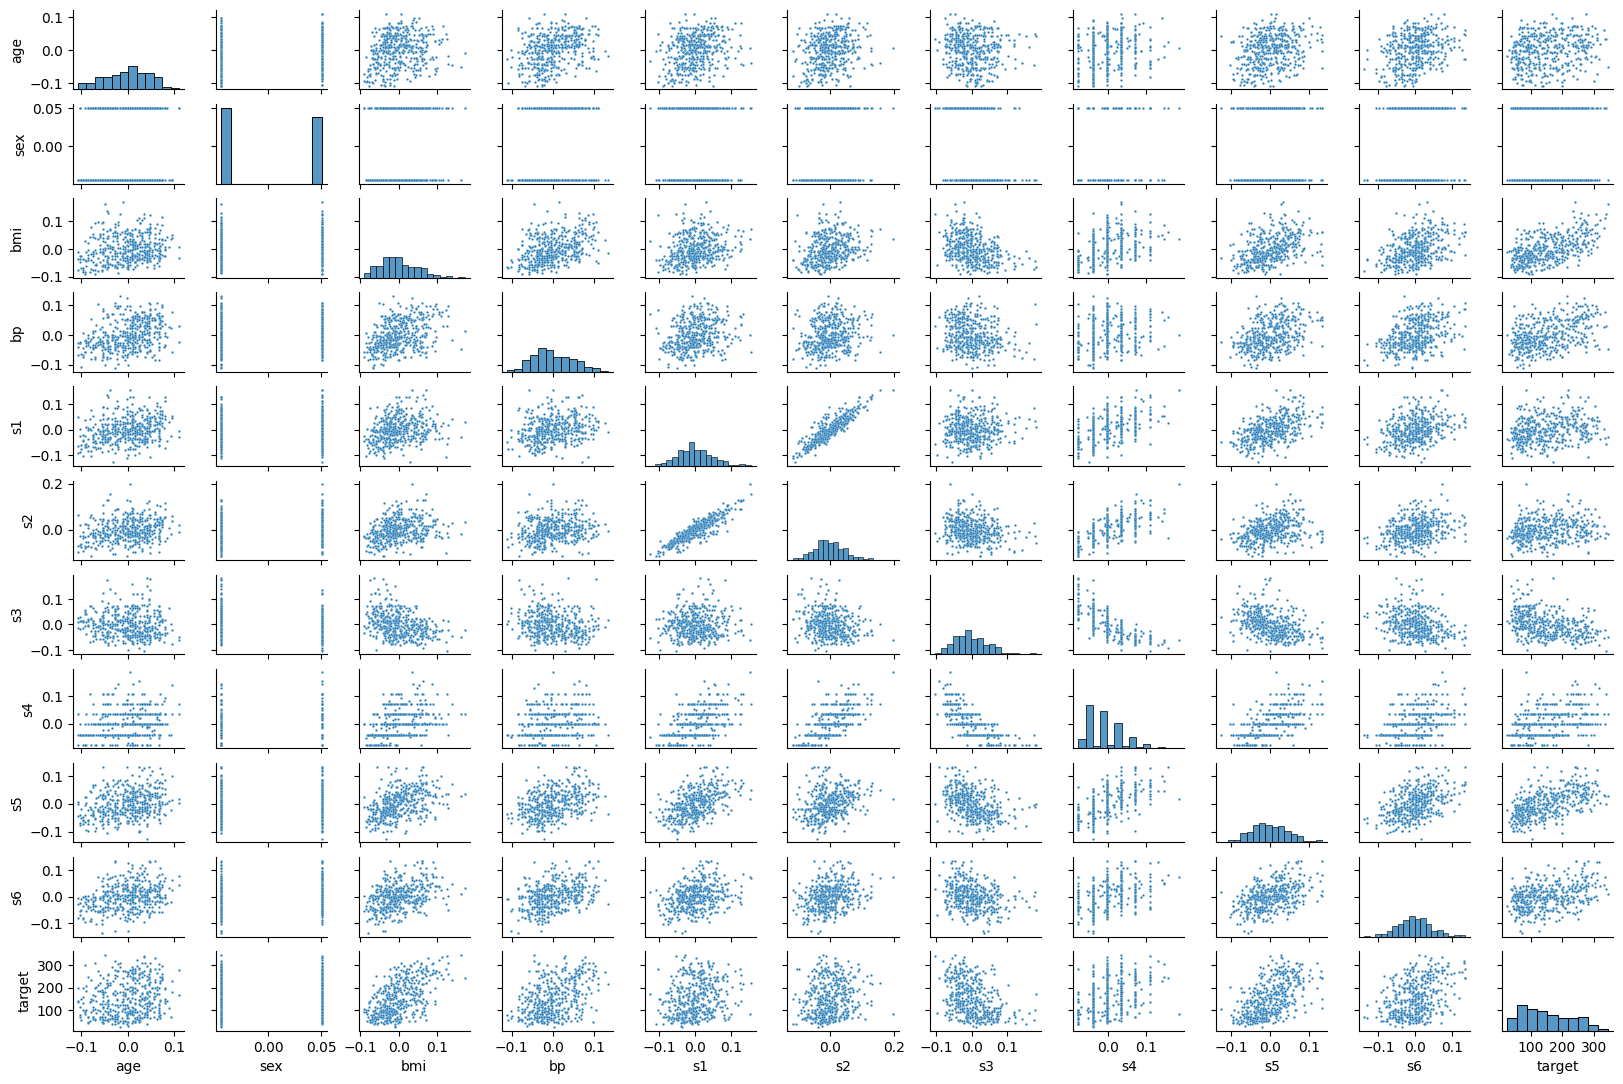

In [3]:
sns.pairplot(df, height = 1, aspect = 1.5, plot_kws = {'s': 3})
plt.show()

Now that we have our data, we can now run linear regressions.

<p style="text-align:left; font-size:large; color:black;">Statsmodels Implementation</p>


Let's say I wanted to use OLS to find the relationship the response variable 'Target' and a single predictor 'bmi'. This is called a __simple linear regression__. In mathematical terms, we are trying to find best best &beta; to model

$$
\text{target} = \beta_{0} + \beta_{1}\text{(bmi)} + \epsilon
$$

We can use the OLS function in statsmodels. The proper form is __sm.OLS(target variable, predictor variables).fit()__

In [26]:
simple_model_sm = sm.OLS(df['target'], sm.add_constant(df['bmi'])).fit()
print(simple_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           3.47e-42
Time:                        21:10:33   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.0


One major thing to note down is the usage of __sm.add_constant()__. Recall the matrix representation of the OLS problem:

$$
\begin{bmatrix}
y_{1} & y_{2} & ... & y_{n} \\
\end{bmatrix} = 
\begin{bmatrix}
\beta_{0} & \beta_{1} & ... & \beta_{p} \\
\end{bmatrix} 
\begin{bmatrix}
1 & 1 & ... & 1 \\
x_{1,1} & x_{1,2} & ... & x_{1,n} \\
x_{2,1} & x_{2,2} & ... & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{p,1} & x_{p,2} & ... & x_{p,n} \\
\end{bmatrix} + 
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{n} \\
\end{bmatrix}, \text{ where } \epsilon_{i} \sim N(0,\sigma^{2}) \\
$$
$$
\vdots
$$
$$
y_{i} = \beta_{0} + \beta_{1}x_{1,i} + \beta_{2}x_{2,i} + \text{ } ... \text{ } + \beta_{p}x_{p,i} + \epsilon_{i}
$$ 

Our top row is just a vector of ones, which is needed to get our constant &beta;<sub>0</sub> term. The sm.add_constant() function essentially appends a vector of 1s to our defined predictors so we can have a constant term. We can choose to not use sm.add_constant() if we do not want a constant term for our model.


Now let's say I wanted to use OLS to find the relationship the response variable 'Target' and a two predictors: 'bmi' and 's5'. This is called a __multiple linear regression__. In mathematical terms, we are trying to find best best &beta; to model

$$
\text{target} = \beta_{0} + \beta_{1}\text{(bmi)} + \beta_{2}\text{(s5)} + \epsilon
$$

In [32]:
multiple_model_sm = sm.OLS(df['target'], sm.add_constant(df[['bmi', 's5']])).fit()
# We use double brackets when referring to multiple columns.
print(multiple_model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     186.6
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           2.25e-59
Time:                        21:14:03   Log-Likelihood:                -2411.2
No. Observations:                 442   AIC:                             4828.
Df Residuals:                     439   BIC:                             4841.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.702     56.303      0.0

<p style="text-align:left; font-size:large; color:black;">Scikit-Learn Implementation</p>

In [6]:
simple_model_sk = LinearRegression()
simple_model_sk.fit(df['bmi'].to_frame(), df['target'])

print('Simple Regression:')
print(f'Intercept Term: {round(simple_model_sk.intercept_, 4)}')
print(f'Coefficient of BMI: {round(simple_model_sk.coef_[0], 4)}')


Simple Regression:
Intercept Term: 152.1335
Coefficient of BMI: 949.4353


When doing linear regressions in Scikit-Learn, a constant term is included by default, so there's no equivalent to sm.add_constant()

In [7]:
multiple_model_sk = LinearRegression()
multiple_model_sk.fit(df[['bmi', 's5']], df['target'])

print('\nMultiple Regression:')
print(f'Intercept Term: {round(multiple_model_sk.intercept_, 4)}')
print(f'Coefficient of BMI: {round(multiple_model_sk.coef_[0], 4)}')
print(f'Coefficient of s5: {round(multiple_model_sk.coef_[1], 4)}')


Multiple Regression:
Intercept Term: 152.1335
Coefficient of BMI: 675.0714
Coefficient of s5: 614.9499


Statsmodels and Scikit-Learn offer their unique advantages when it comes to linear models, so it makes sense to understand both methodologies.

<p style="text-align:left; font-size:large; color:black;">Understanding the Statsmodels Summary</p>

In [10]:
# Middle
summary_as_lines = simple_model_sm.summary().as_text().split('\n')
for i in range(11, 17):
    print(summary_as_lines[i])

# Provide context of what the hypothesis test is
# target ~ bmi shows us that we can use a significance level of 0.001 to reject the null hyp
    # Explain that we can approximately model target via target = 152.1335 + 949.4353(bmi)
# Give example of something that wouldn't pass hyp test. Probably like age

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301


Top: This tells of the goodness-of-fit of our linear model

In [11]:
# Top
for i in range(1, 12):
    print(summary_as_lines[i][39:])

# R^2 / Adjusted R^2: You know it's for explained variance type shit, but know what adj does.
# F-statistic, same thing
# Log-Likelihood: You know what this is. Explain how it's prevalent method of fitting a Logistic Regression
# AIC/BIC
    
# Note down that all of these mainly serve as relative measures. You can compare it to the multi-reg and see which one has better values
# Basically, checking which model fomr a set of models has the 'best' fit.

 R-squared:                       0.344
 Adj. R-squared:                  0.342
 F-statistic:                     230.7
 Prob (F-statistic):           3.47e-42
 Log-Likelihood:                -2454.0
 AIC:                             4912.
 BIC:                             4920.
                                       
                                       


Bottom:
This section mainly tells us about the distribution of our residuals

In [12]:
# Bottom
for i in range(16, 22):
    print(summary_as_lines[i])

# Omnibus: Understand this better (probably something to do with homosced of resids)
# Skew/Kurtosis: Normal dist has skew 0 and kurt 3
# Durbin-Watson: Measure of normality, but more useful for time-series analysis problems
# Jarque-Bera: test for normality
# Condition Number:

Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0


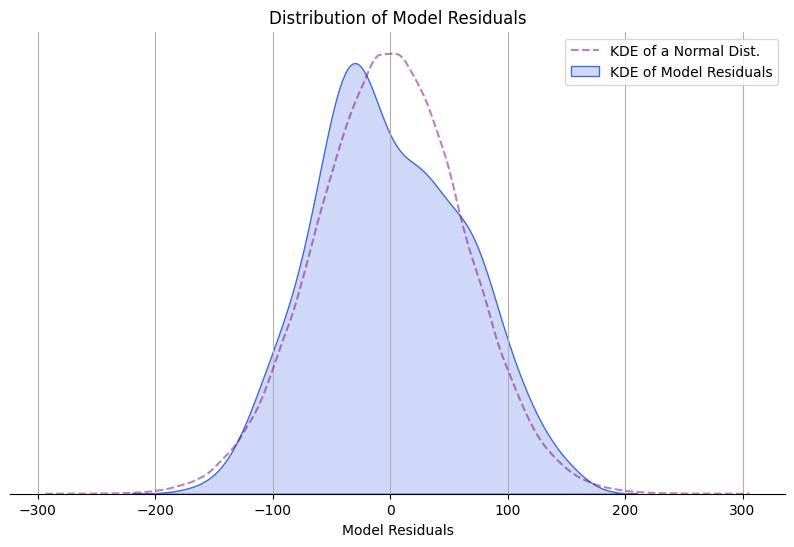

In [20]:
# Plotting residuals against a theoretical normal distribution:
plt.figure(figsize = (10,6))
sns.kdeplot(np.random.normal(loc = 0, scale = np.std(simple_model_sm.resid), size = 200000), label = 'KDE of a Normal Dist.', color = 'purple', alpha = 0.5, linestyle = '--')
sns.kdeplot(simple_model_sm.resid, label = 'KDE of Model Residuals', color = '#4169E1', fill = True)
plt.legend()
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.xlabel('Model Residuals')
plt.yticks([])
plt.ylabel("")
plt.grid(True)
plt.title('Distribution of Model Residuals')
plt.show()
# tie it back to Jarque-Bera and Omnibus, which provided evidence against normal dist in the model resid.

<p style="text-align:left; font-size:large; color:black;">Getting Predictions From Our Model</p>

In [9]:
x_vals = pd.Series(np.linspace(np.min(df['bmi']), np.max(df['bmi']), 1000))
predictions = simple_model_sm.get_prediction(sm.add_constant(x_vals))
mean_values = predictions.predicted_mean
values_confidence_interval = predictions.conf_int()

model_predictions = pd.DataFrame({'Fitted X Values (BMI)': x_vals,              # X values that we want to predict Y with
                                 'Predicted Y Values (Target)': mean_values,    # Expected Value/Mean of Y given X
                                 '[0.025':values_confidence_interval[:, 0],     # Lower Bound of Confidence Interval
                                 '0.975]':values_confidence_interval[:, 1]})    # Upper Bound of Confidence Interval
model_predictions

# Explain that this same logic can be applied to the multiple linear regression
# Show that these can be used to make graphs

,Fitted X Values (BMI),Predicted Y Values (Target),[0.025,0.975]
0,-0.090275,66.422935,53.885808,78.960062
1,-0.090014,66.670825,54.162069,79.179580
2,-0.089753,66.918714,54.438313,79.399116
3,-0.089492,67.166604,54.714538,79.618670
4,-0.089231,67.414493,54.990745,79.838242
...,...,...,...,...
995,0.169511,313.073071,291.441658,334.704484
996,0.169772,313.320961,291.658660,334.983262
997,0.170033,313.568850,291.875658,335.262042
998,0.170294,313.816740,292.092653,335.540827


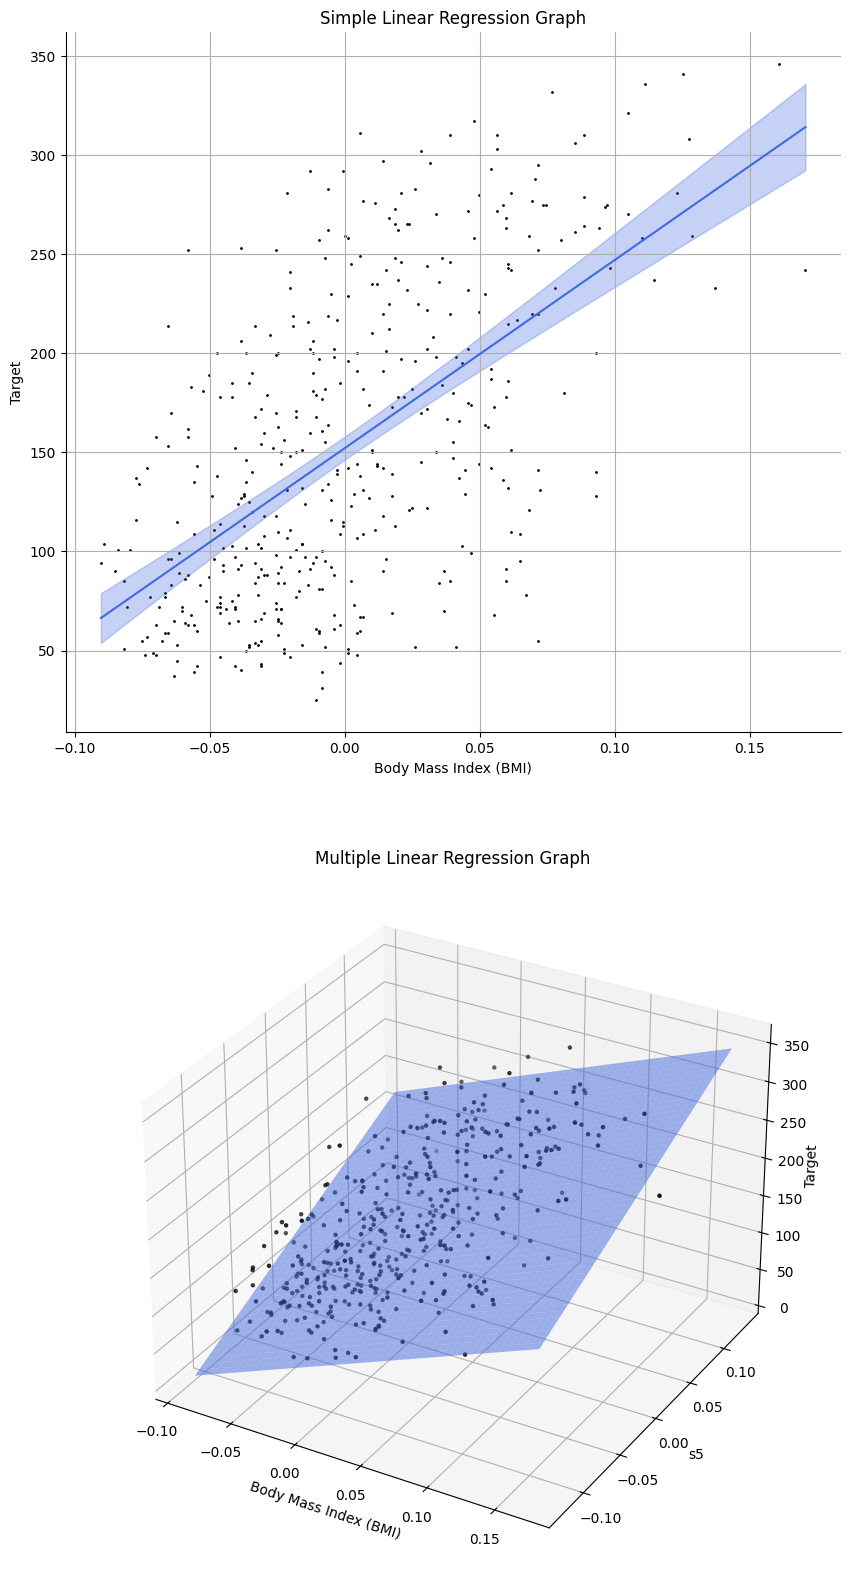

<Figure size 1200x1200 with 0 Axes>

In [12]:
fig = plt.figure(figsize = (10,20))
ax1 = plt.subplot(2, 1, 1)
ax1.scatter(df['bmi'], df['target'], s = 1, color = 'black')
ax1.plot(x_vals, mean_values, color = '#4169E1', linestyle = '-')
ax1.fill_between(x_vals, values_confidence_interval[:, 0], values_confidence_interval[:, 1], color = '#4169E1', alpha = 0.3, label = 'Confidence Interval')
ax1.grid(True)
ax1.spines[['top', 'right']].set_visible(False)
ax1.set_xlabel('Body Mass Index (BMI)')
ax1.set_ylabel('Target')
ax1.set_title('Simple Linear Regression Graph')

# Plotting a plane of best fit for our multiple linear regression by using predictions of given inputs 
prediction_inputs = pd.DataFrame()
prediction_inputs['bmi'] = np.linspace(np.min(df['bmi']), np.max(df['bmi']), 100)
prediction_inputs['s5'] = np.linspace(np.min(df['s5']), np.max(df['s5']), 100)

X, Y = np.meshgrid(prediction_inputs['bmi'], prediction_inputs['s5'])
meshgrid_coordinates = np.column_stack([X.flatten(), Y.flatten()])
Z = multiple_model_sm.predict(sm.add_constant(meshgrid_coordinates))
Z = Z.reshape(X.shape)

ax2 = plt.subplot(2, 1, 2, projection = '3d')
fig = plt.figure(figsize = (12,12))
ax2.scatter(df['bmi'], df['s5'], df['target'], color = 'black', s = 5)
ax2.plot_surface(X, Y, Z, color = '#4169E1', alpha = 0.5)
ax2.set_xlabel('Body Mass Index (BMI)')
ax2.set_ylabel('s5')
ax2.set_zlabel('Target', labelpad = 0)
ax2.set_title('Multiple Linear Regression Graph')

plt.show()

<hr>
<p style="text-align:center; font-size:x-large; color:black;">Diagnostic Plots</p>
<hr>

<p style="text-align:left; font-size:large; color:black;">Residual Plot</p>

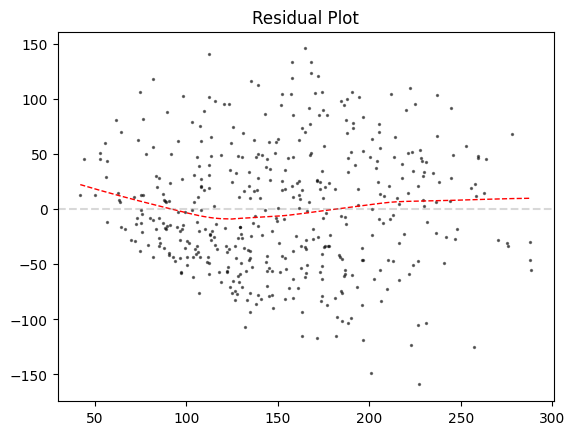

Jarque-Bera test statistic: 5.551640336047028
Jarque-Bera p-value: 0.062298360607363185


In [34]:
target_predictions = multiple_model_sm.predict(sm.add_constant(df[['bmi', 's5']]))
sns.regplot(x = target_predictions, y = multiple_model_sm.resid, lowess = True,
            scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
            line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'})
plt.axhline(y = 0, color = 'gray', linestyle = '--', alpha = 0.3)
plt.title('Residual Plot')
plt.show()

jb_statistic, jb_p_value = jarque_bera(multiple_model_sm.resid)

print("Jarque-Bera test statistic:", jb_statistic)
print("Jarque-Bera p-value:", jb_p_value)

<p style="text-align:left; font-size:large; color:black;">Scale-Location Plot</p>

It’s also called a Spread-Location plot. This plot shows if residuals are spread equally along the ranges of predictors. This is how you can check the assumption of equal variance (homoscedasticity). It’s good if you see a horizontal line with equally (randomly) spread points.

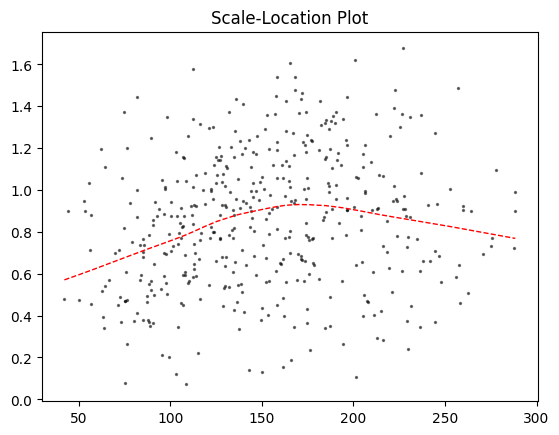

Breusch-Pagan test statistic: 11.616355936112711
Breusch-Pagan p-value: 0.0030028964641244074


In [35]:
mean_resid = np.mean(multiple_model_sm.resid)
std_resid = np.std(multiple_model_sm.resid)
standardized_residuals = [(x - mean_resid) / std_resid for x in multiple_model_sm.resid]
sns.regplot(x = target_predictions, y = np.sqrt(np.abs(standardized_residuals)), lowess = True,
            scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
            line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'})
plt.title('Scale-Location Plot')
plt.show()

bp_test = het_breuschpagan(multiple_model_sm.resid, sm.add_constant(df[['bmi', 's5']]))
bp_test_statistic = bp_test[0]
bp_p_value = bp_test[1]

print("Breusch-Pagan test statistic:", bp_test_statistic)
print("Breusch-Pagan p-value:", bp_p_value)

<p style="text-align:left; font-size:large; color:black;">Standardized Residuals v.s Leverage</p>

0.030431050728614326


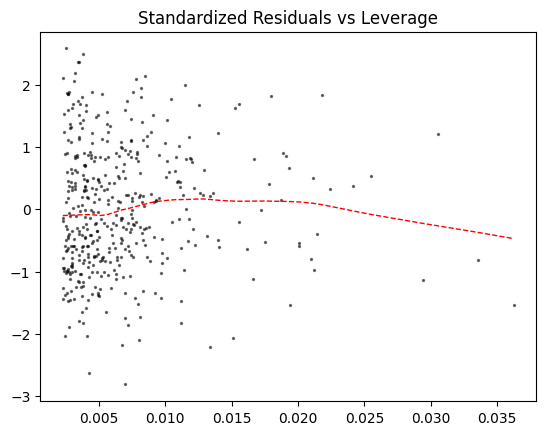

In [43]:
influence = multiple_model_sm.get_influence()
print(np.max(influence.cooks_distance[0]))
# Cook's distance is returned as a tuple, with the first element being the Cook's distance values
# and the second element being the p-values associated with the F-test for each data point

sns.regplot(x = influence.hat_matrix_diag, y = standardized_residuals, lowess=True,
            scatter_kws = {'color': 'black', 'alpha': 0.5, 's':2},
            line_kws={'color': 'red', 'lw': 1, 'linestyle':'--'})
plt.title('Standardized Residuals vs Leverage')
plt.show()


<p style="text-align:left; font-size:large; color:black;">QQ-Plot</p>

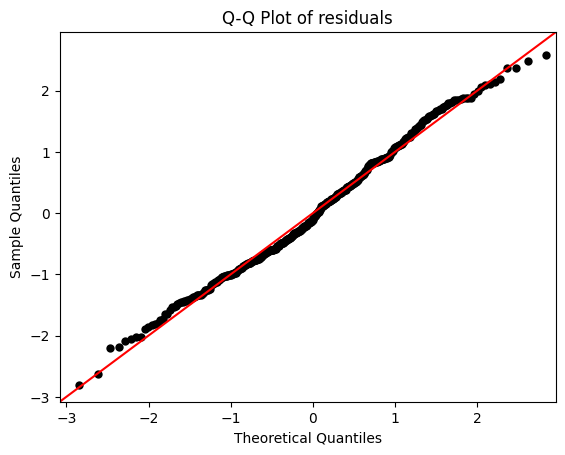

In [37]:
sm.qqplot(np.array(standardized_residuals), line = '45',  markerfacecolor = 'black', markeredgecolor  = 'None')
plt.title('Q-Q Plot of residuals')
plt.show()

<hr>
<p style="text-align:center; font-size:x-large; color:black;">Linear Model Metrics</p>
<hr>

A lot of model metrics were mentioned before but there are quite a few that can't be directly accessed from the statsmodels summary. Some of these are calculated, or can be accessed via sklearn.
<p style="text-align:left; font-size:large; color:black;">Mean Squared Error, Bias, and Variance</p>

Explanation of MSE
$$
\text{Mean Squared Error (MSE)} = \frac{1}{n} \sum_{i = 1}^{n} (y_{i} - \hat{y_{i}})^{2} = E[(y_{i} - \hat{y_{i}})^{2}]
$$
Explanation of Bias
$$
\text{Bias} = E[(y_{i} - \hat{y_{i}})]
$$
Explanation of Variance
$$
\text{Variance} = Var(y_{i} - \hat{y_{i}})
$$

Break here

$$
Var(y_{i} - \hat{y_{i}}) =  E[(y_{i} - \hat{y_{i}})^{2}] - (E[(y_{i} - \hat{y_{i}})])^{2}
$$

$$
\text{Variance} = \text{MSE} - \text{Bias}^{2}
$$

$$
\text{MSE} = \text{Bias}^{2} + \text{Variance}
$$

Break here
$$
\text{MSE} = \text{Bias}^{2} + \text{Variance} + \text{Unexplicable Error}
$$
Explanation of graphs below here

<img src="BiasVarianceImage.jpeg" width="600"/> <img src="BiasVarianceMSE.png" width="600"/>

Calculating MSE, Bias Vairance in Python

RMSE/MAE/MAPE, basically the other ones

<hr>
<p style="text-align:center; font-size:x-large; color:black;">Cross-Validation (CV) Methods</p>
<hr>

Point of CV: We want to test on unseen data. That is where those model metrics actually come into play. So far, we have fit our models the the entire data set. This doesn't give us much detail wen it comes to the predictive power of a Linear Model <br>
Cross-validation is a technique used in machine learning and statistics to evaluate the performance of a predictive model. While it does involve testing on unseen data, its goal is broader than just that.

The primary goal of cross-validation is to estimate how well a predictive model will generalize to new, unseen data. It does so by partitioning the available data into multiple subsets (or "folds") and performing training and testing on different combinations of these subsets. This helps to assess the model's performance across different data samples and reduces the risk of overfitting or underfitting to a particular dataset.

Text(0.5, 1.0, 'Simple Linear Regression Graph')

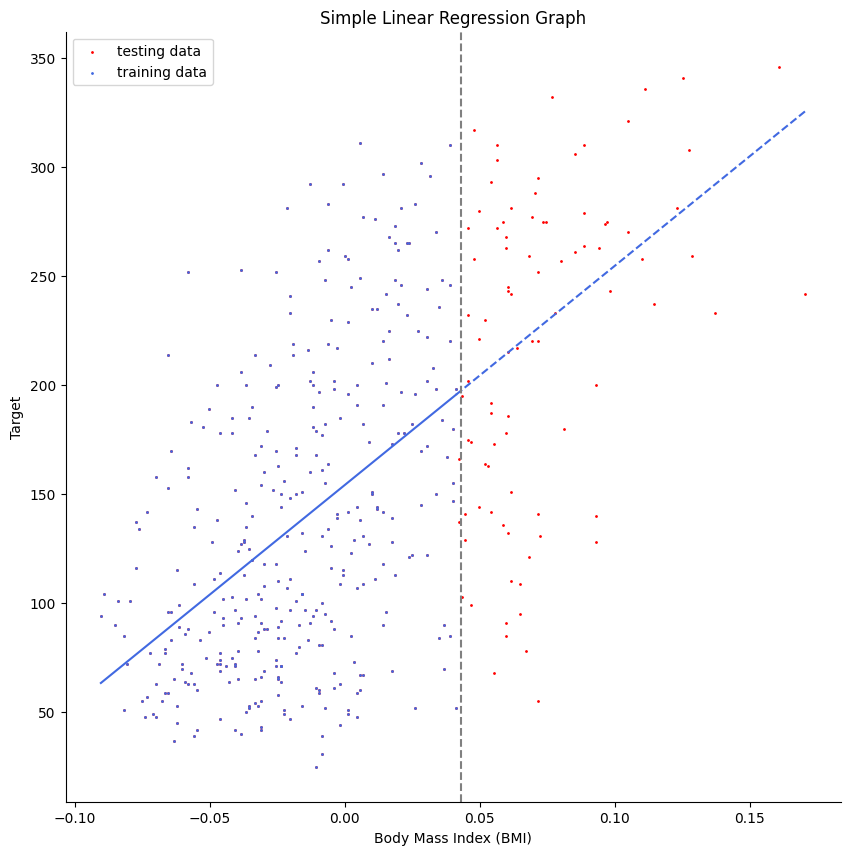

In [46]:
training_data = df[df['bmi'] < np.percentile(df['bmi'], 80)]
simple_training_model = sm.OLS(training_data['target'], sm.add_constant(training_data['bmi'])).fit()

x_vals = pd.Series(np.linspace(np.min(training_data['bmi']), np.max(training_data['bmi']), 100))
predictions = simple_training_model.get_prediction(sm.add_constant(x_vals))
mean_values = predictions.predicted_mean

more_x_vals = pd.Series(np.linspace(np.max(training_data['bmi']), np.max(df['bmi']), 100))
more_predictions = simple_training_model.get_prediction(sm.add_constant(more_x_vals))
more_mean_values = more_predictions.predicted_mean

fig = plt.figure(figsize = (10,10))

plt.scatter(df['bmi'], df['target'], s = 1, color = 'red', label = 'testing data')
plt.scatter(training_data['bmi'], training_data['target'], s = 1, color = '#4169E1', label = 'training data')

plt.plot(x_vals, mean_values, color = '#4169E1', linestyle = '-')
plt.plot(more_x_vals, more_mean_values, color = '#4169E1', linestyle = '--')

plt.axvline(np.max(training_data['bmi']) + 0.002, linestyle = '--', color = 'gray')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('Target')
plt.legend()
plt.title('Simple Linear Regression Graph')



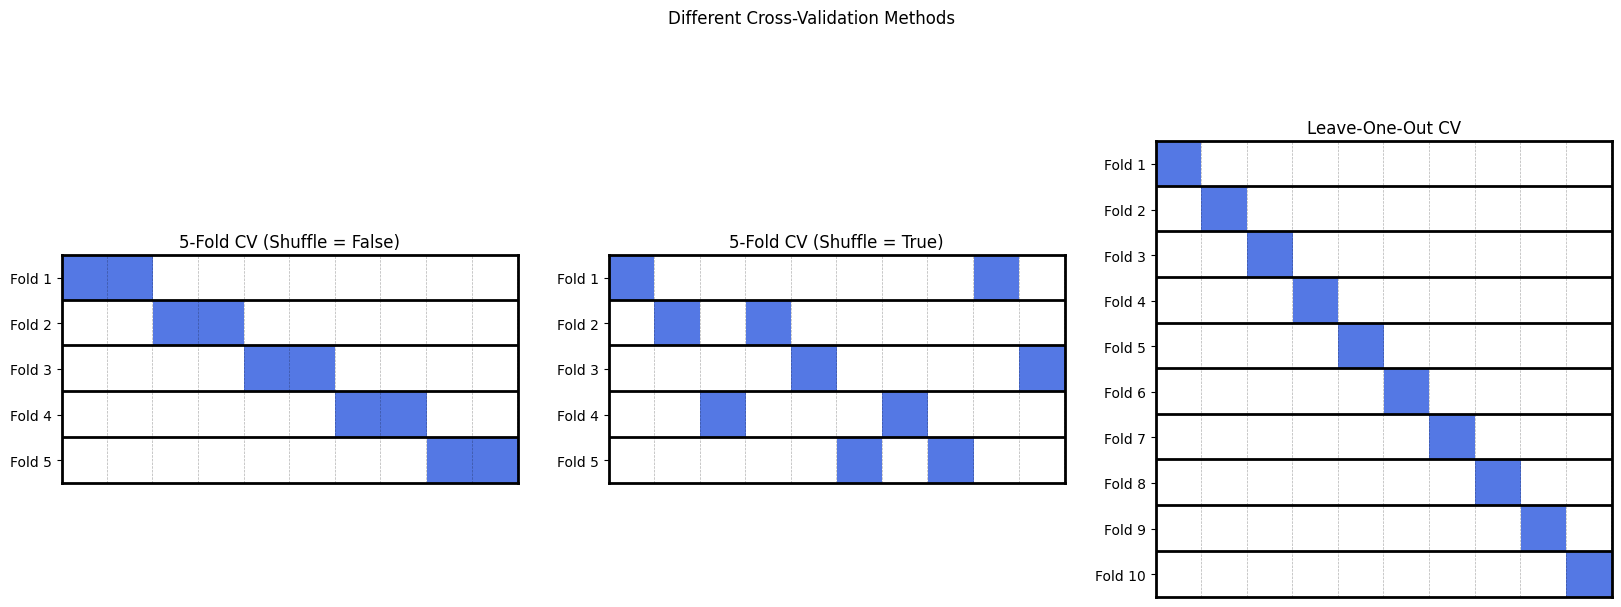

In [77]:
grid1 = [[1,1,0,0,0,0,0,0,0,0],
        [0,0,1,1,0,0,0,0,0,0],
        [0,0,0,0,1,1,0,0,0,0],
        [0,0,0,0,0,0,1,1,0,0],
        [0,0,0,0,0,0,0,0,1,1]]
grid2 = [[1,0,0,0,0,0,0,0,1,0],
        [0,1,0,1,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,0,0,1],
        [0,0,1,0,0,0,1,0,0,0],
        [0,0,0,0,0,1,0,1,0,0]]
grid3 = np.eye(10)

colors = ['white', '#4169E1E6']
custom_cmap = LinearSegmentedColormap.from_list('KFCV', colors)

fig, axs = plt.subplots(1, 3, figsize=(20, 12))

ax1 = axs[0]
ax1.imshow(grid1, interpolation = 'None', cmap = custom_cmap)
ax1.set_title('5-Fold CV (Shuffle = False)')

ax2 = axs[1]
ax2.imshow(grid2, interpolation = 'None', cmap = custom_cmap)
ax2.set_title('5-Fold CV (Shuffle = True)')

ax3 = axs[2]
ax3.imshow(grid3, interpolation = 'None', cmap = custom_cmap)
ax3.set_title('Leave-One-Out CV')
fold_positions = range(10)
fold_labels = [f'Fold {i+1}' for i in range(10)]
ax3.set_yticks(fold_positions)
ax3.set_yticklabels(fold_labels)

hlines = [0.48, 1.48, 2.48, 3.48]
vlines = np.arange(0.49, 10, 1)
plots = [ax1, ax2]
for plot in plots:
    fold_positions = range(5)
    fold_labels = [f'Fold {i+1}' for i in range(5)]
    plot.set_yticks(fold_positions)
    plot.set_yticklabels(fold_labels)
    for hline in hlines:
        plot.axhline(hline, color='black', linewidth = 2, linestyle = '-')
        

hlines2 = [0.48, 1.48, 2.48, 3.48, 4.48, 5.48, 6.48, 7.48, 8.48]
for hline in hlines2:
    ax3.axhline(hline, color = 'black', linewidth = 2, linestyle = '-')

plots = [ax1, ax2, ax3]
for plot in plots:
    for vline in vlines:
        plot.axvline(vline, color='black', linewidth = 0.5, linestyle = '--', alpha = 0.3)
        plot.spines[['top', 'left', 'bottom', 'right']].set_linewidth(2)
        plot.set_xticks([])
        
        # plot.set_yticks([])

# plt.suptitle('Different Cross-Validation Methods')
# plt.tight_layout()
plt.subplots_adjust(top=1.25)
plt.show()


<p style="text-align:left; font-size:large; color:black;">Implementation of CV Methods on our Simple Linear Regresion</p>

In [40]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
LOO = LeaveOneOut()

Cross_Vaildation_Methods = [k_fold, LOO]
Scoring_Methods = ['neg_mean_absolute_error', 
                   'neg_mean_squared_error',
                   'neg_root_mean_squared_error',
                   'neg_mean_absolute_percentage_error']
results = []
for CV_method in Cross_Vaildation_Methods:
    for scoring_method in Scoring_Methods:
        score = cross_val_score(LinearRegression(), df[['bmi','s5']], df['target'].to_frame(), cv = CV_method, scoring = scoring_method)
        if 'neg_' in scoring_method:
            score = score * -1
        results.append(np.mean(score))

results = pd.DataFrame(np.array(results).reshape(-1, len(Scoring_Methods)))
results.index = ['10-Fold CV', 'Leave-One-Out CV']
results.columns = ['MAE', 'MSE', 'RMSE', 'MAPE']
results
# Now you have to do best subset-selection methods with this...

,MAE,MSE,RMSE,MAPE
10-Fold CV,47.231103,3261.660639,56.861703,0.420617
Leave-One-Out CV,47.114468,3247.978920,47.114468,0.419706


<hr>
<p style="text-align:center; font-size:x-large; color:black;"> Subset Selection Methods </p>
<hr>

In [11]:
# All Subset Selection, performance measured by 10-fold CV of MSE
def all_possible_subsets(df):

    pred_vars = df.columns.drop(['target'])
    subset_models = pd.DataFrame(columns = ['subset_size', 'subset', '10-Fold Test MSE'])

    # In the null hypothesis, coefs are assumed to be 0, and the intercept is just the mean (provide expectation proof)
    target_mean = np.mean(df['target'])
    null_model_prediction = np.full_like(df['target'], fill_value = target_mean)

    k_fold = KFold(n_splits = 10, shuffle = True)
    MSEs = []

    for train_index, test_index in k_fold.split(df):
        y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']
        MSEs.append(mean_squared_error(y_true = y_test, y_pred = null_model_prediction[test_index]))

    subset_models.loc[len(subset_models.index)] = [0, "Null Model", np.mean(MSEs)]


    for subset_length in range(1, len(pred_vars) + 1):
        for subset in combinations(pred_vars, subset_length):

            k_fold = KFold(n_splits = 10, shuffle = True)
            MSEs = []
            for train_index, test_index in k_fold.split(df):
                x_train, x_test = df.iloc[train_index][np.array(subset)], df.iloc[test_index][np.array(subset)]
                y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']
                linear_model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
                target_predictions = linear_model.predict(sm.add_constant(x_test))
                MSEs.append(mean_squared_error(y_true = y_test, y_pred = target_predictions)) 

            subset_models.loc[len(subset_models.index)] = [len(subset), ', '.join(subset), np.mean(MSEs)]
            
    return subset_models

subset_models = all_possible_subsets(df)
subset_models

,subset_size,subset,10-Fold MSE
0,0,Null Model,5930.469072
1,1,age,5774.332939
2,1,sex,5962.528143
3,1,bmi,3922.744669
4,1,bp,4819.803750
...,...,...,...
1019,9,"age, sex, bmi, s1, s2, s3, s4, s5, s6",3189.163561
1020,9,"age, sex, bp, s1, s2, s3, s4, s5, s6",3428.636738
1021,9,"age, bmi, bp, s1, s2, s3, s4, s5, s6",3137.428400
1022,9,"sex, bmi, bp, s1, s2, s3, s4, s5, s6",2996.828154


In [1]:
best_per_level = subset_models.groupby(['subset_size']).min('10-Fold MSE').reset_index()
best_subset_size = best_per_level[best_per_level['10-Fold MSE'] == best_per_level['10-Fold MSE'].min()]
best_subset = subset_models[subset_models['10-Fold MSE'] == subset_models['10-Fold MSE'].min()]

print(best_subset)

plt.scatter(subset_models['subset_size'], subset_models['10-Fold MSE'], s = 1, color = 'black')
plt.plot(best_per_level['subset_size'], best_per_level['10-Fold MSE'], linestyle = '-', linewidth = 1, color = '#4169E1')
plt.axvline(x = best_subset_size.iloc[0,0], color = 'purple', linestyle = '--', linewidth = 1)

plt.gca().spines[['right', 'top']].set_visible(False)
plt.title('10-Fold MSE of All Possible Subsets')
plt.ylabel('MSE')
plt.xlabel('Subset Size')
plt.xticks(range(11))
plt.show()

NameError: name 'subset_models' is not defined

In [3]:
def forward_stepwise(df):

    colnames = df.columns.drop(['target'])
    print("Current Columns To Iterate Through: ", colnames)
    
    # In the null hypothesis, coefs are assumed to be 0, and the intercept is just the mean (provide expectation proof)
    target_mean = np.mean(df['target'])
    null_model_prediction = np.full_like(df['target'], fill_value = target_mean)

    k_fold = KFold(n_splits = 10, shuffle = True)
    MSEs = []

    for train_index, test_index in k_fold.split(df):
        y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']
        MSEs.append(mean_squared_error(y_true = y_test, y_pred = null_model_prediction[test_index]))

    current_best_mse = np.mean(MSEs)
    current_best_subset = np.array([])
    best_model_found = False

    while best_model_found != True:

        current_models_dict = {}

        for col in colnames:

            temp_subset = np.append(current_best_subset, col)

            MSEs = []
            for train_index, test_index in k_fold.split(df):
                x_train, x_test = df.iloc[train_index][np.array(temp_subset)], df.iloc[test_index][np.array(temp_subset)]
                y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']
                linear_model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
                target_predictions = linear_model.predict(sm.add_constant(x_test))
                MSEs.append(mean_squared_error(y_true = y_test, y_pred = target_predictions)) 
            current_models_dict[tuple(temp_subset)] = np.mean(MSEs)

        # print('Iteration Results: ', current_models_dict)
        print('Iteration Results:')
        for key, value in current_models_dict.items():
            print(key, value)
        min_subset = min(current_models_dict, key = current_models_dict.get)
        print('Subset with smallest MSE: ', min_subset)

        if current_models_dict[min_subset] <= current_best_mse:
            print('Prev Best Subset had MSE of: ', current_best_mse)
            current_best_mse = current_models_dict[min_subset]
            print('New Best MSE is:', current_best_mse)
            current_best_subset = np.array(min_subset)
            print('New Subset with smallest MSE: ', current_best_subset)
            colnames = colnames[np.isin(colnames, np.array(min_subset), invert=True)]
            print()
            print('New Cols to Iterate Through: ', colnames)
        else:
            best_model_found = True
            print('No better model found during iteration')
            print('Best Subset: ', current_best_subset)
            print('end')
           

    
forward_stepwise(df)

Current Columns To Iterate Through:  Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Iteration Results:
('age',) 5777.156839089668
('sex',) 5990.747560659388
('bmi',) 3917.8847826983256
('bp',) 4809.249633744355
('s1',) 5696.458232046903
('s2',) 5809.465752313928
('s3',) 5059.531998804771
('s4',) 4879.377377214857
('s5',) 4077.035300604623
('s6',) 5101.528485713914
Subset with smallest MSE:  ('bmi',)
Prev Best Subset had MSE of:  5935.01049501795
New Best MSE is: 3917.8847826983256
New Subset with smallest MSE:  ['bmi']

New Cols to Iterate Through:  Index(['age', 'sex', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Iteration Results:
('bmi', 'age') 3909.7268911838446
('bmi', 'sex') 3959.019947485972
('bmi', 'bp') 3621.6725183110675
('bmi', 's1') 3921.185221784918
('bmi', 's2') 3950.2990882590884
('bmi', 's3') 3718.1082321883705
('bmi', 's4') 3684.7171606181682
('bmi', 's5') 3234.3675504352923
('bmi', 's6') 3793.7289726100034
Subset w

In [29]:
def backward_stepwise(df):
    
    best_subset_found = False
    current_preds = df.columns.drop('target')
    k_fold = KFold(n_splits = 10, shuffle = True)

    # First use full model for starting MSE
    MSEs = []
    for train_index, test_index in k_fold.split(df):
        x_train, x_test = df.iloc[train_index][current_preds], df.iloc[test_index][current_preds]
        y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']

        linear_model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
        target_predictions = linear_model.predict(sm.add_constant(x_test))
        MSE = mean_squared_error(y_true = y_test, y_pred = target_predictions)
        MSEs.append(MSE)

    current_best_MSE = np.mean(MSEs)

    # Iterations
    while best_subset_found != True:
        
        dropped_pred_models = {}
        print(f'Dropping preds from {current_preds}')
        
        for pred in current_preds:
            
            # Temporarily dropping a predictor
            temp_preds = current_preds.drop(pred)

            MSEs = []

            for train_index, test_index in k_fold.split(df):
                x_train, x_test = df.iloc[train_index][temp_preds], df.iloc[test_index][temp_preds]
                y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']

                linear_model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
                target_predictions = linear_model.predict(sm.add_constant(x_test))
                MSE = mean_squared_error(y_true = y_test, y_pred = target_predictions)
                MSEs.append(MSE)
        
            dropped_pred_models[pred] = np.mean(MSEs)

        print(f'Current Best Test MSE = {current_best_MSE}')
        for key, value in dropped_pred_models.items():
            print(f'Dropping {key}:', f'Test MSE = {value}', f', Improvement of Current MSE = {current_best_MSE - value}')
        
        min_pred = min(dropped_pred_models, key = dropped_pred_models.get)

        if(dropped_pred_models[min_pred] <= current_best_MSE):
            print(f'Dropping {min_pred} improves our model the most')
            current_best_MSE = dropped_pred_models[min_pred]
            current_preds = current_preds.drop(min_pred)
            print()
        else:
            print(f'Dropping {min_pred} does not improve our model')
            print(current_preds)
            best_subset_found = True

backward_stepwise(df)

Dropping preds from Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
Current Best Test MSE = 3004.664885127128
Dropping age: Test MSE = 2983.6099368155974 , Improvement of Current MSE = 21.054948311530552
Dropping sex: Test MSE = 3090.6490642198396 , Improvement of Current MSE = -85.98417909271166
Dropping bmi: Test MSE = 3395.5922710617792 , Improvement of Current MSE = -390.9273859346513
Dropping bp: Test MSE = 3151.424172031543 , Improvement of Current MSE = -146.75928690441515
Dropping s1: Test MSE = 3037.813564215198 , Improvement of Current MSE = -33.14867908806991
Dropping s2: Test MSE = 3029.001227831686 , Improvement of Current MSE = -24.336342704557865
Dropping s3: Test MSE = 3041.6264624888418 , Improvement of Current MSE = -36.96157736171381
Dropping s4: Test MSE = 3013.580782664448 , Improvement of Current MSE = -8.915897537320234
Dropping s5: Test MSE = 3160.8575726745553 , Improvement of Current MSE = -156.19268754742734
Dropping s6:

Current Best Test MSE = 2983.6099368155974
Dropping sex: Test MSE = 3072.780247636708 , Improvement of Current MSE = -89.17031082111043
Dropping bmi: Test MSE = 3398.9021348375327 , Improvement of Current MSE = -415.2921980219353
Dropping bp: Test MSE = 3132.987771465853 , Improvement of Current MSE = -149.3778346502554
Dropping s1: Test MSE = 3031.839377049508 , Improvement of Current MSE = -48.229440233910736
Dropping s2: Test MSE = 3041.0947069715376 , Improvement of Current MSE = -57.48477015594017
Dropping s3: Test MSE = 2976.2131021356904 , Improvement of Current MSE = 7.396834679906988
Dropping s4: Test MSE = 2984.0543342114593 , Improvement of Current MSE = -0.4443973958618699
Dropping s5: Test MSE = 3201.3555194947976 , Improvement of Current MSE = -217.7455826792002
Dropping s6: Test MSE = 2965.5132039949176 , Improvement of Current MSE = 18.09673282067979
Dropping s6 improves our model the most

Dropping preds from Index(['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5'], dt

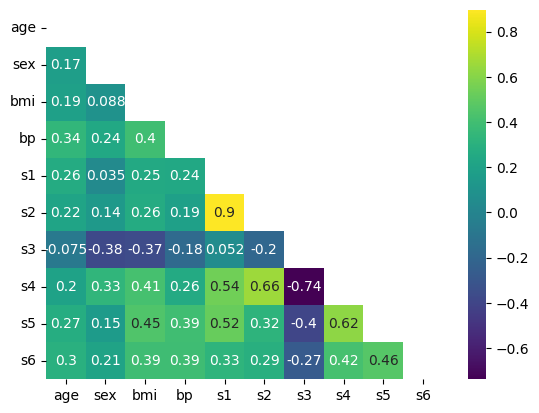

In [35]:
pred_vars = df.columns.drop(['target'])
correlation_matrix = df[pred_vars].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot = True, mask = mask, cmap = 'viridis')
plt.yticks(rotation=0)
plt.show()

In [69]:
# Dealing with Multi-collinearity
    # Step 1: Explain how multi-collinearity fucks up the model.
    # Step 2: Show how to identify multicollinearity: VIF, heatmap
    # Step 3: 

vif_data = pd.DataFrame()
vif_data["Variable"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(exog = df.values, exog_idx = i) for i in range(len(df.columns))]
# print(vif_data)

temp = df[['age', 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6', 'target']]
new_vif_data = pd.DataFrame()
new_vif_data['Variable'] = temp.columns
new_vif_data["VIF"] = [variance_inflation_factor(exog = temp.values, exog_idx = i) for i in range(len(temp.columns))]
# print(new_vif_data)

abcd = sm.OLS(df['target'], sm.add_constant(df[['sex', 'bmi', 'bp', 's1', 's3', 's5']])).fit()
print(abcd.summary())


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     76.44
Date:                Thu, 21 Mar 2024   Prob (F-statistic):           6.31e-65
Time:                        22:16:08   Log-Likelihood:                -2388.1
No. Observations:                 442   AIC:                             4790.
Df Residuals:                     435   BIC:                             4819.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.058      0.0

In [ ]:
# Methods of Determining Outliers
    # Domain Knowledge: Consider the context of your data and consult subject matter experts to determine whether identified outliers are valid data points or errors that need to be addressed.
    # Typical Data Viz/ Outlier methods e.g IQR of Boxplot or Z-scores
    # Cook's Distance and sensitivity analysis with it


# All-Subsets Regression:
# 
# Exhaustively evaluate all possible combinations of predictors and select the subset that optimizes a chosen criterion, such as adjusted R-squared, AIC, BIC, or cross-validated performance metrics.
# This approach provides a comprehensive evaluation of all possible models but can be computationally expensive, especially for large numbers of predictors.
# Regularization Techniques:
# 
# Use regularization methods such as Lasso (L1 regularization) or Ridge (L2 regularization) regression to penalize the coefficients of less important predictors, effectively driving them towards zero.
# These techniques automatically select a subset of predictors by shrinking some coefficients to zero, thereby performing feature selection and improving model interpretability.
# The choice of regularization strength (e.g., the penalty parameter in Lasso regression) can be tuned using cross-validation.
# Forward Selection:
# 
# Start with an empty model and iteratively add predictors that improve model performance the most until no further improvement is observed.
# This approach is computationally efficient and can provide a good subset of predictors, but it may not always find the globally optimal subset.
# Backward Elimination:
# 
# Start with a full model containing all predictors and iteratively remove predictors that contribute the least to the model until further removal degrades model performance.
# This approach is similar to forward selection but may be more computationally expensive, especially for large datasets with many predictors.
# Stepwise Regression:
# 
# Combine forward and backward selection techniques to iteratively add and remove predictors based on statistical significance or model performance criteria.
# Stepwise regression can be forward, backward, or both, and it aims to strike a balance between computational efficiency and model performance.
# Information Criteria:
# 
# Use information criteria such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to compare different models based on their goodness of fit and complexity.
# Models with lower AIC or BIC values are preferred, indicating a better trade-off between model fit and complexity.
# Domain Knowledge:
# 
# Incorporate domain knowledge and expert judgment to select predictors that are theoretically relevant or known to have a significant impact on the response variable.
# Domain knowledge can help guide the selection process and improve the interpretability of the final model.

<hr>
<p style="text-align:center; font-size:x-large; color:black;"> Regularization Methods </p>
<hr>

<p style="text-align:left; font-size:large; color:black;"> Least Absolute Shrinkage and Selection Operation (LASSO) Regression</p>

$$
\min_{\beta} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} + \lambda \sum_{j=1}^{p} | \beta_{j} |
$$
�
β represents the vector of coefficients to be estimated.
�
n is the number of observations.
�
p is the number of features.
�
λ is the regularization parameter, controlling the amount of shrinkage applied to the coefficients. <br>
Yes, Lasso regression is commonly used for feature selection. Lasso regression (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that adds a penalty term to the ordinary least squares (OLS) cost function, where the penalty is the absolute value of the coefficients multiplied by a regularization parameter (alpha). This penalty encourages the coefficients of less important features to be exactly zero, effectively performing feature selection by shrinking the coefficients of less important features towards zero.

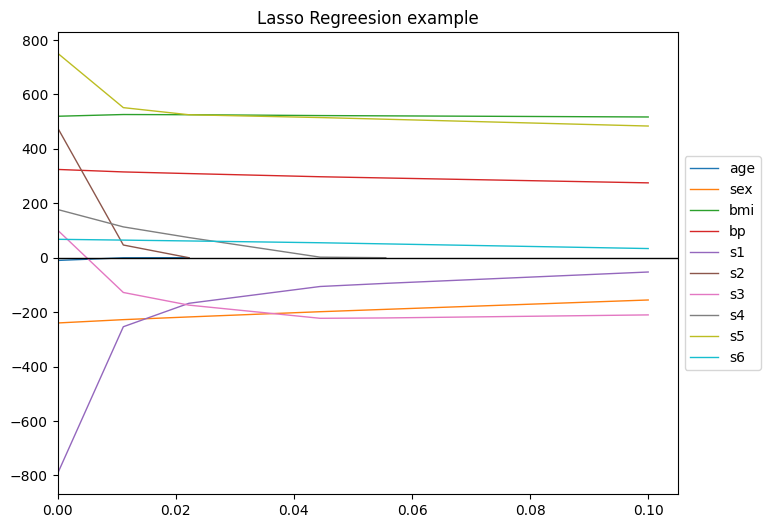

In [38]:
lasso_coefs = pd.DataFrame(columns = df.columns.drop('target'))
alphas = np.linspace(0, 0.1, 10)

for a in alphas:
    lasso = Lasso(alpha = a)  # alpha is the regularization parameter
    lasso.fit(df[df.columns.drop('target')], df['target'])
    lasso_coefs.loc[len(lasso_coefs)] = lasso.coef_

lasso_coefs.index = alphas

fig = plt.figure(figsize = (8, 6))
for col in df.columns.drop('target'):

    first_zero_found = len(lasso_coefs)
    for i in range(len(lasso_coefs)):
        if lasso_coefs.iloc[i][col] == 0:
            first_zero_found = min(first_zero_found, i)

    plt.plot(lasso_coefs.index[0:first_zero_found + 1], lasso_coefs.iloc[0:first_zero_found + 1][col], linewidth = 1, label = col)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 0, color = 'black', linestyle ='-', linewidth = 1)
plt.title('Lasso Regreesion example')
plt.xlim(left = 0)
plt.show()

# Ridge regression for multicollinearity (probably going to be used since we have multicollinearity)
# Lasso regression for sparsity 
    # Understand why this is
# Elastic-Net Regression (probably not going to be used since we don't have sparse data)



In [38]:
# Utilizing Lasso to minimize MSE (roughly alpha = 0.025)
# A more seasoned appraoch is using GridSearchCV, which tunes multiple hyperparameters simultaneously


# alphas = np.linspace(0, 1, 500)
alphas = np.linspace(0.05, 0.06, 10)
hyperparams = {'alpha': alphas}
lasso = Lasso()

# Understand why these scores are slightly different
best_lasso_model = GridSearchCV(lasso, hyperparams, cv = 20, scoring = 'neg_mean_squared_error')
best_lasso_model.fit(df[df.columns.drop('target')], df['target'])
print(best_lasso_model.best_params_)
print(-best_lasso_model.best_score_)

{'alpha': 0.052222222222222225}
2995.664862514337


<p style="text-align:left; font-size:large; color:black;"> Ridge Regression </p>

$$
\min_{\beta} \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2} + \lambda \sum_{j=1}^{p} (\beta_{j})^{2}
$$

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]


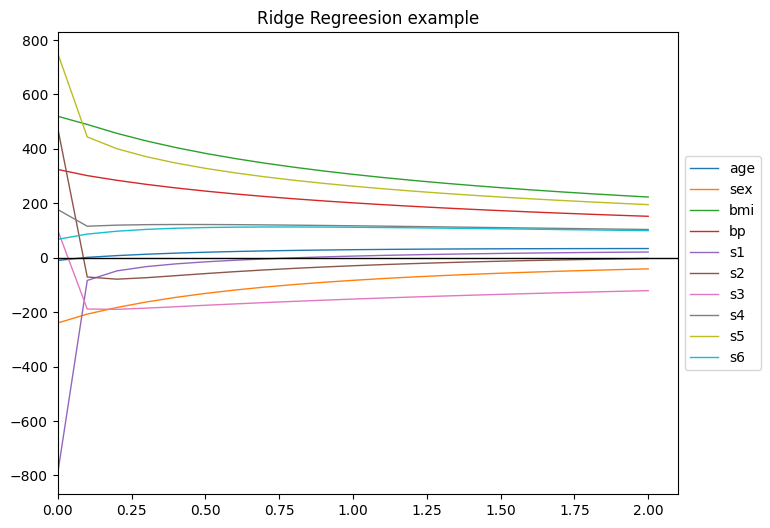

In [22]:
ridge_coefs = pd.DataFrame(columns = df.columns.drop('target'))
alphas = np.linspace(0, 2, 21)

for a in alphas:
    ridge = Ridge(alpha = a)  # alpha is the regularization parameter
    ridge.fit(df[df.columns.drop('target')], df['target'])
    ridge_coefs.loc[len(ridge_coefs)] = ridge.coef_

ridge_coefs.index = alphas

fig = plt.figure(figsize = (8, 6))
for col in df.columns.drop('target'):

    first_zero_found = len(ridge_coefs)
    for i in range(len(ridge_coefs)):
        if ridge_coefs.iloc[i][col] == 0:
            first_zero_found = min(first_zero_found, i)

    plt.plot(ridge_coefs.index[0:first_zero_found + 1], ridge_coefs.iloc[0:first_zero_found + 1][col], linewidth = 1, label = col)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.axhline(y = 0, color = 'black', linestyle ='-', linewidth = 1)
plt.title('Ridge Regreesion example')
plt.xlim(left = 0)
plt.show()

# Can't really graph ElasticNet because there are two varialbes at play (The L1 Ratio and the Alpha parameter)

In [ ]:
# Backward stepwise selection:
    # Remove pred with highest p-values or resulting model with least decrease in AIC/BIC? and check model fit. Iterate until model doesn't improve
# Bidirectional stepwise (both forward and backward):
    # Add a predictor via forward criterion.
    # Remove a predictor via backward criterion.

In [41]:
alphas = np.linspace(0.03, 0.07, 100)
# l1_ratios = np.linspace(0.9,1,11)

hyperparams = {'alpha': alphas}
ElasticNetModel = Ridge()

# Understand why these scores are slightly different
best_lasso_model = GridSearchCV(ElasticNetModel, hyperparams, cv = 10, scoring = 'neg_mean_squared_error')
best_lasso_model.fit(df[df.columns.drop('target')], df['target'])
print(best_lasso_model.best_params_)
print(-best_lasso_model.best_score_)

{'alpha': 0.043333333333333335}
2997.183662498862


In [46]:
alphas = np.linspace(0.05, 0.06, 21)
l1_ratios = np.linspace(0.9,1,21)

hyperparams = {'alpha': alphas, 'l1_ratio': l1_ratios}
ElasticNetModel = ElasticNet()

# Understand why these scores are slightly different
best_lasso_model = GridSearchCV(ElasticNetModel, hyperparams, cv = 10, scoring = 'neg_mean_squared_error')
best_lasso_model.fit(df[df.columns.drop('target')], df['target'])
print(best_lasso_model.best_params_)
print(-best_lasso_model.best_score_)

{'alpha': 0.055, 'l1_ratio': 1.0}
2987.197879681187


<p style="text-align:left; font-size:large; color:black;"> Elastic-Net Regression </p>

<p style="text-align:left; font-size:large; color:black;"> Hyperparameter Tuning With GridSearchCV</p>

Just give example with Lasso tbh. They'll get the vibe of Ridge, and then you can just explain that ElasticNet will achieve the same thing. Compare GridSearchCv to your own methods.

    Alpha  10-Fold Test MSE
0     0.0       3007.061665
1     0.5       3173.791830
2     1.0       3365.496705
3     1.5       3550.579131
4     2.0       3741.771984
5     2.5       3903.663832
6     3.0       4018.681204
7     3.5       4133.171903
8     4.0       4219.924525
9     4.5       4309.795661
10    5.0       4422.394892
11    5.5       4473.022148
12    6.0       4535.314774
13    6.5       4624.644046
14    7.0       4685.976721
15    7.5       4716.750520
16    8.0       4790.532100
17    8.5       4790.885654
18    9.0       4832.930835
19    9.5       4911.100129
20   10.0       4918.884694


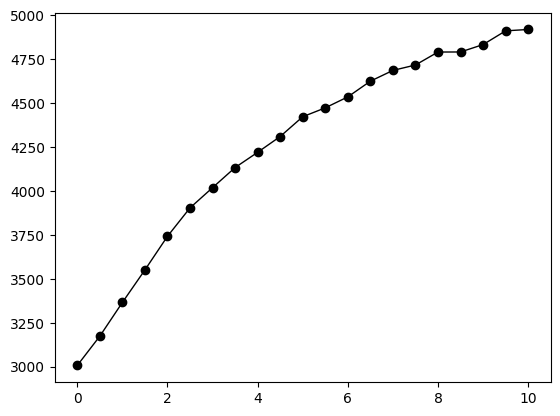

    Alpha  10-Fold Test MSE
0    0.00       3052.487224
1    0.01       2997.249336
2    0.02       3020.139872
3    0.03       3032.165509
4    0.04       3013.726637
5    0.05       3002.900950
6    0.06       3006.492472
7    0.07       3000.814938
8    0.08       3008.619907
9    0.09       2997.553217
10   0.10       2982.101083
11   0.11       3008.790628
12   0.12       3004.946111
13   0.13       3028.702983
14   0.14       3039.561804
15   0.15       3013.752834
16   0.16       3009.916049
17   0.17       3016.504592
18   0.18       3036.606452
19   0.19       3064.009423
20   0.20       3059.011052
21   0.21       3030.773183
22   0.22       3057.134310
23   0.23       3050.598997
24   0.24       3058.157629
25   0.25       3051.978724
26   0.26       3073.136003
27   0.27       3057.308213
28   0.28       3082.400475
29   0.29       3077.392924
30   0.30       3083.348971
31   0.31       3057.884945
32   0.32       3076.760051
33   0.33       3069.732399
34   0.34       3065

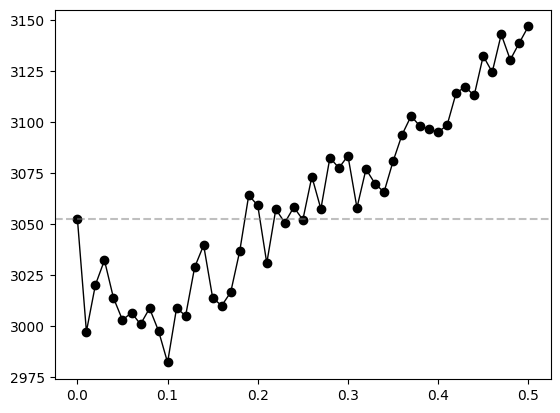

   Alpha  10-Fold Test MSE
0    0.0       3046.514267
    Alpha  10-Fold Test MSE
0   0.000       2984.722083
1   0.002       2981.430443
2   0.004       3025.086687
3   0.006       2983.334371
4   0.008       3010.465542
5   0.010       3009.053692
6   0.012       3012.442158
7   0.014       3006.316378
8   0.016       3016.269593
9   0.018       2978.075002
10  0.020       2979.761906
11  0.022       3019.312346
12  0.024       2990.787553
13  0.026       3007.775643
14  0.028       2996.615972
15  0.030       3011.603063
16  0.032       3035.866519
17  0.034       3000.306314
18  0.036       3006.846706
19  0.038       3012.667693
20  0.040       3042.919997
21  0.042       2997.047840
22  0.044       3031.328942
23  0.046       2988.617870
24  0.048       2967.032932
25  0.050       3021.478351
26  0.052       2998.181653
27  0.054       3033.883030
28  0.056       3013.552588
29  0.058       3015.183195
30  0.060       2995.840454
31  0.062       3022.025274
32  0.064       2984.1

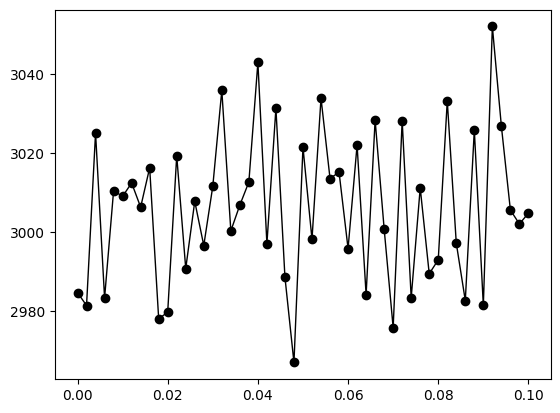

In [89]:
def hyperparameter_tuning(df, alphas, regularization_method):
    
    Regularization_Method = None
    if regularization_method == 'Lasso':
        Regularization_Method = Lasso()
    elif regularization_method == 'Ridge':
        Regularization_Method = Ridge()
    
    k_fold = KFold(n_splits = 10, shuffle = True)

    # First use full model for starting MSE
    
    results = pd.DataFrame(columns = ['Alpha', '10-Fold Test MSE'])
    for alpha in alphas:

        Regularization_Method.alpha = alpha
        MSEs = []

        for train_index, test_index in k_fold.split(df):
            x_train, x_test = df.iloc[train_index][df.columns.drop('target')], df.iloc[test_index][df.columns.drop('target')]
            y_train, y_test = df.iloc[train_index]['target'], df.iloc[test_index]['target']

            regularization_model = Regularization_Method.fit(x_train, y_train)
            target_predictions = regularization_model.predict(x_test)
            MSE = mean_squared_error(y_true = y_test, y_pred = target_predictions)
            MSEs.append(MSE)
        results.loc[len(results)] = [alpha, np.mean(MSEs)]
    
    return results



alphas = np.linspace(0, 10, 21)
first_search = hyperparameter_tuning(df, alphas, 'Ridge')
print(first_search)
plt.plot(first_search['Alpha'], first_search['10-Fold Test MSE'], linewidth = 1, color = 'black',  marker='o')
plt.show()

alphas = np.linspace(0, 0.5, 51)
second_search = hyperparameter_tuning(df, alphas, 'Ridge')
print(second_search)
plt.plot(second_search['Alpha'], second_search['10-Fold Test MSE'], linewidth = 1, color = 'black',  marker='o')
plt.axhline(y = second_search['10-Fold Test MSE'][0], color = 'grey', linestyle = '--', alpha = 0.5)
plt.show()

zero = hyperparameter_tuning(df, [0], 'Lasso')
alphas = np.linspace(0, 0.1, 51)
third_search = hyperparameter_tuning(df, alphas, 'Ridge')
print(zero)
print(third_search)
plt.plot(third_search['Alpha'], third_search['10-Fold Test MSE'], linewidth = 1, color = 'black',  marker='o')
# plt.axhline(y = zero['10-Fold Test MSE'][0], color = 'grey', linestyle = '--', alpha = 0.5)
plt.show()


Initial Coarse Grid Search: Start with a coarse grid search over a wide range of hyperparameters to get an initial estimate of the optimal values. This helps in identifying a rough region of the hyperparameter space where the best-performing models lie.

Analyze Results: Analyze the results of the initial grid search to identify promising ranges or values for the hyperparameters. Look for trends, such as regions where the model performance is consistently good or where it changes rapidly.

Define a Refined Grid: Based on the analysis, define a refined grid search space that focuses on the promising regions identified in the initial search. Narrow down the ranges and decrease the step sizes for the hyperparameters you want to fine-tune.

Perform Refined Grid Search: Conduct the refined grid search over the narrowed-down search space. This involves training and evaluating models using the refined grid of hyperparameters.

Evaluate Performance: Evaluate the performance of models trained with the refined grid of hyperparameters. Use cross-validation or a separate validation set to ensure that the performance generalizes well to unseen data.

Iterate as Needed: Depending on the results of the refined grid search, you may need to iterate and further refine the search space. You can repeat steps 2 to 5 as needed until you're satisfied with the performance or computational constraints are reached.

Final Validation: Once you have identified the best hyperparameters, validate the final model configuration on a holdout test set or through additional cross-validation to ensure its generalization performance.

In [3]:
GridSearchCVresults = pd.DataFrame(columns = ['Best Alpha', 'Test MSE'])

for i in range(50):

    # Initial Split of Data
    # Split your dataset into training and testing sets. Typically, you allocate a certain percentage of your data (e.g., 70-80%) for training and the remaining portion for testing. 
    # This ensures that you have independent data to evaluate the model's performance after hyperparameter tuning.
    
    x_train, x_test, y_train, y_test = train_test_split(df[df.columns.drop('target')], df['target'], test_size = 0.2)

    model = Ridge()
    params = {'alpha': np.linspace(0, 10, 11)}
    grid_search = GridSearchCV(model, params, cv = 10, scoring = 'neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # print("Best parameters found: ", grid_search.best_params_)
    # print("Best estimator found: ", grid_search.best_estimator_)
    # print("Best score found: ", -grid_search.best_score_)

    y_pred = grid_search.predict(x_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error: ", mse)
    print(f'Trail {i+1}: Alpha = {grid_search.best_params_.get('alpha')}, Test MSE = {mse}')
    GridSearchCVresults.loc[len(GridSearchCVresults)] = [grid_search.best_params_.get('alpha'), mse]
    print()

print(GridSearchCVresults)

Mean Squared Error:  2696.312403502884
Trail 1: Alpha = 0.0, Test MSE = 2696.312403502884

Mean Squared Error:  3384.5150505188712
Trail 2: Alpha = 0.0, Test MSE = 3384.5150505188712

Mean Squared Error:  3645.3667191118616
Trail 3: Alpha = 0.0, Test MSE = 3645.3667191118616

Mean Squared Error:  3052.741608576467
Trail 4: Alpha = 0.0, Test MSE = 3052.741608576467

Mean Squared Error:  2886.5218071986064
Trail 5: Alpha = 0.0, Test MSE = 2886.5218071986064

Mean Squared Error:  2824.4459826459192
Trail 6: Alpha = 0.0, Test MSE = 2824.4459826459192

Mean Squared Error:  2878.6386585660694
Trail 7: Alpha = 0.0, Test MSE = 2878.6386585660694

Mean Squared Error:  3245.6769637100556
Trail 8: Alpha = 0.0, Test MSE = 3245.6769637100556

Mean Squared Error:  2478.244261813871
Trail 9: Alpha = 0.0, Test MSE = 2478.244261813871

Mean Squared Error:  3904.5446401466934
Trail 10: Alpha = 0.0, Test MSE = 3904.5446401466934

Mean Squared Error:  3037.156666066177
Trail 11: Alpha = 0.0, Test MSE = 30

KeyboardInterrupt: 

In [4]:
barplot_data = GridSearchCVresults.groupby('Best Alpha').agg(count = ('Test MSE', 'size'), mean_mse = ('Test MSE', 'mean'))
print(barplot_data)

x_train, x_test, y_train, y_test = train_test_split(df[df.columns.drop('target')], df['target'], test_size = 0.2)
model = Ridge(alpha = 0.002)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)


            count     mean_mse
Best Alpha                    
0.0            27  3010.267631
Mean Squared Error:  2510.373468424914


In [44]:
# Use this section for graphics production as well
# Yes, you can perform ElasticNet regression after a forward stepwise selection process.
# Forward stepwise selection is a feature selection technique used to identify a subset of relevant predictors to include in the model, 
# while ElasticNet regression is a regularization technique that can be applied to the selected subset of predictors to improve the model's performance.

# Comparison of OLS and Lasso, Ridge, ElasticNet (should do LOO CV)
both_scores = pd.DataFrame(columns = ['alpha', 'l1_ratio', 'ElasticNet Score', 'OLS Score'])

for i in range(1):
        RidgeRegression = ElasticNet()
        alphas = np.linspace(0.04, 0.06, 21)
        l1_ratios = np.linspace(0.9, 1, 11)
        hyperParameters = {'alpha' : alphas, 'l1_ratio' : l1_ratios}
        # hyperParameters = {'alpha' : alphas}

        # cross_validation = KFold(n_splits = 10, shuffle = True)
        cross_validation = LeaveOneOut()

        ridgeRegressor = GridSearchCV(RidgeRegression, hyperParameters, scoring='neg_mean_squared_error', cv = cross_validation) # When using CV, the scoring metric is performed on unseen data
        ridgeRegressor.fit(df[['bmi', 's5', 'bp', 'sex', 's3', 's2']], df['target'])

        # for i in range(len(ridgeRegressor.cv_results_['params'])):
        #         print(ridgeRegressor.cv_results_['params'][i], ridgeRegressor.cv_results_['mean_test_score'][i])
        # 
        
        print(ridgeRegressor.best_params_['alpha'])
        # print(ridgeRegressor.best_params_['l1_ratio'])

        print(-ridgeRegressor.best_score_)

        scores = cross_val_score(LinearRegression(), df[['bmi', 's5', 'bp', 'sex', 's3', 's2']], df['target'], cv = cross_validation, scoring = 'neg_mean_squared_error')
        print(-np.mean(scores))
        print()

        both_scores.loc[len(both_scores)] = [ridgeRegressor.best_params_['alpha'], ridgeRegressor.best_params_['l1_ratio'], -ridgeRegressor.best_score_, -np.mean(scores)]

print(both_scores)

# it suggests that the Lasso penalty (L1 regularization) is effective in dealing with multicollinearity by performing variable selection.
# Show graph at alpha = 0.05


0.04
2990.7972714030916
2986.1929246734367

   alpha  l1_ratio  ElasticNet Score    OLS Score
0   0.04       1.0       2990.797271  2986.192925


In [46]:
print(both_scores)
print(np.mean(both_scores['ElasticNet Score']))
print(np.mean(both_scores['OLS Score']))

scores = cross_val_score(LinearRegression(), df[['sex', 'bmi', 'bp', 's1', 's2', 's3', 's5']], df['target'], cv = LeaveOneOut(), scoring = 'neg_mean_squared_error')
print(-np.mean(scores))
print()

# current best: alpha = 0.05, l1_ratio = 1, MSE LOOCV = 2993.760192
# normal OLS mode: MSE LOOCV = 3001.752847

   alpha  l1_ratio  ElasticNet Score    OLS Score
0   0.04       1.0       2990.797271  2986.192925
2990.7972714030916
2986.1929246734367


2979.392823684574



<p style="text-align:center; font-size:x-large; color:black;">Putting Everything Together</p>

In this notebook, I covered several types of ways to find a linear model to try and predict

Things not mention:
- Principal Components Regression
- Least Angle Regression
- Analyzing/Removing Outliers and High-Leverage Points